# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Carissa Chung 10124444

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TODO: Import dataset and inspect the first five columns
column_names = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel', 
                'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Class']
df = pd.read_table('seeds_dataset.txt', names = column_names)
df.head(5)

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop('Class', axis= 1)
y = df['Class']


In [6]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Since there is no indicator that the data follows a normal distribution and the possibility that it could contain varying scales, it would be best to use the MinMaxScaler.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [7]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [12]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (157, 7)
Shape of y_train: (157,)


Now that we have our training data, we can implement our selected scaler.

In [13]:
# TODO: Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("transformed shape: {}".format(X_train_scaled.shape))

transformed shape: (157, 7)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [15]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [16]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [23]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

test_score = grid.score(X_test_scaled, y_test)
print("Test set score:", test_score)


Best parameters: {'C': 1.0, 'fit_intercept': True}
Best cross-validation score: 0.930241935483871
Test set score: 0.9245283018867925


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [24]:
# TODO: Predict y labels using best estimator
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

y_pred = grid.best_estimator_.predict(X_test_scaled)


In [25]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(2)
X_test_pca = pca.fit_transform(X_test_scaled)

In [27]:
print(X_test.shape)
print(X_test_pca.shape)

(53, 7)
(53, 2)


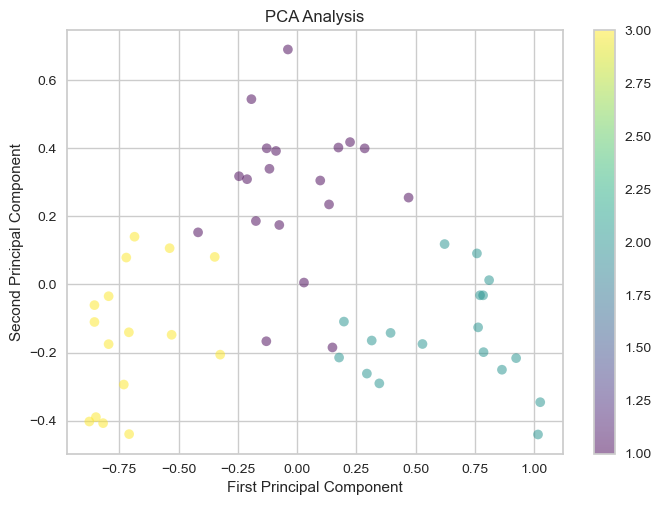

In [56]:
# TODO: Plot test points colored by predicted label
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
            c=y_pred, 
            cmap='viridis',
            edgecolor='none',
            alpha=0.5)
plt.title('PCA Analysis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Yes, I believe that this model worked well for this dataset. This is because the scores for both the training and testing data were high and similar which indicates low bias and low variance. This means that the model does not underfit or overfit the training data.
1. Yes, PCA appears to have worked well for this model. From the scatter plot, all 3 of the predicted labels (classes) are nicely grouped together. Since both PCA and logistic regression are both linear and we got good results, we could assume that this dataset is linear.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code I've used for this assignment were referenced from the lab and in-class examples.
2. I completed all steps in order for this assignment.
3. I had used generative AI to get cmap options for the scatter plot to ensure that all three classes were visible (not too light of a color) and easily distinguishable (not similar colors for each class). The prompt was very simple ("What cmap options are there for matplotlib.pyplot scatter plots"). Generative AI was not used to generate any code.
4. The in-class examples and lab examples were very useful and helped me work through the assignment with little challenges.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [73]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler
column_names = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel', 
                'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Class']
df = pd.read_table('seeds_dataset.txt', names = column_names)
X = df.drop('Class', axis= 1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

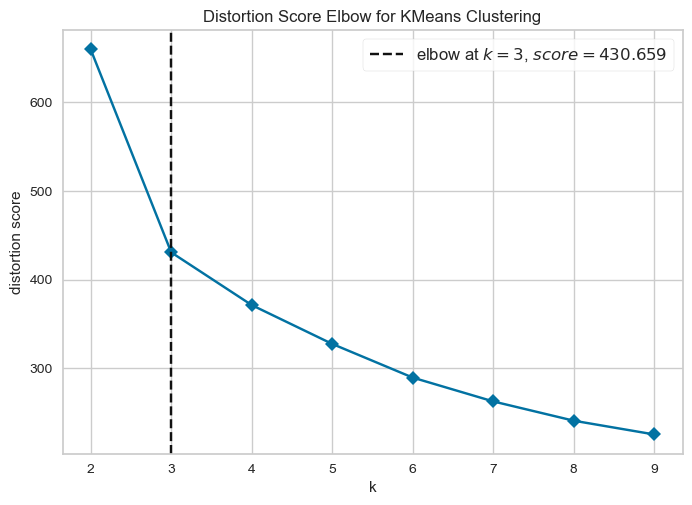

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# TODO: Use the elbow method to determine the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='distortion', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()


c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

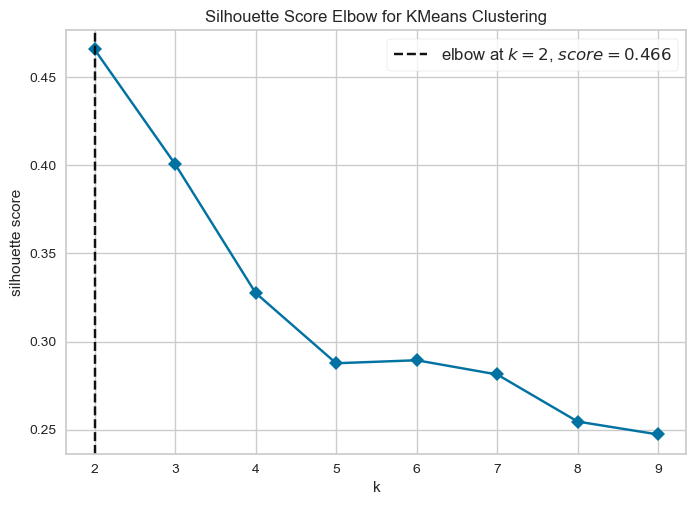

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
#silhouette
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='silhouette', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

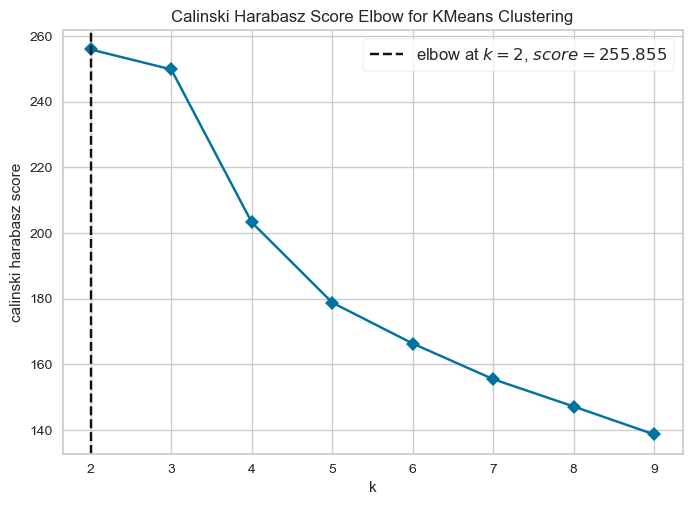

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [76]:
#Calinksi Harabasz
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='calinski_harabasz', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

- k = 3 for Distrotion
- k = 2 for Silhouette and Calinski_harabasz

In [77]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [78]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

# Silhouette score
silhouette_cluster = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_cluster}")

# Calinski-Harabasz score
calinski_harabasz_cluster = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_cluster}")

# Davies-Bouldin score
davies_bouldin_cluster = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {davies_bouldin_cluster}")

Silhouette Score: 0.46577247686580914
Calinski-Harabasz Score: 255.85482678628833
Davies-Bouldin Score: 0.7968788694686013


In [88]:
# Tried using k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(X_scaled)

labels_3 = kmeans_3.labels_

# Silhouette score
silhouette_3_cluster = silhouette_score(X_scaled, labels_3)
print(f"Silhouette Score: {silhouette_3_cluster}")

# Calinski-Harabasz score
calinski_harabasz_3_cluster = calinski_harabasz_score(X_scaled, labels_3)
print(f"Calinski-Harabasz Score: {calinski_harabasz_3_cluster}")

# Davies-Bouldin score
davies_bouldin_3_cluster = davies_bouldin_score(X_scaled, labels_3)
print(f"Davies-Bouldin Score: {davies_bouldin_3_cluster}")

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Note: Only the Davies-Bouldin score increased with k=3

Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

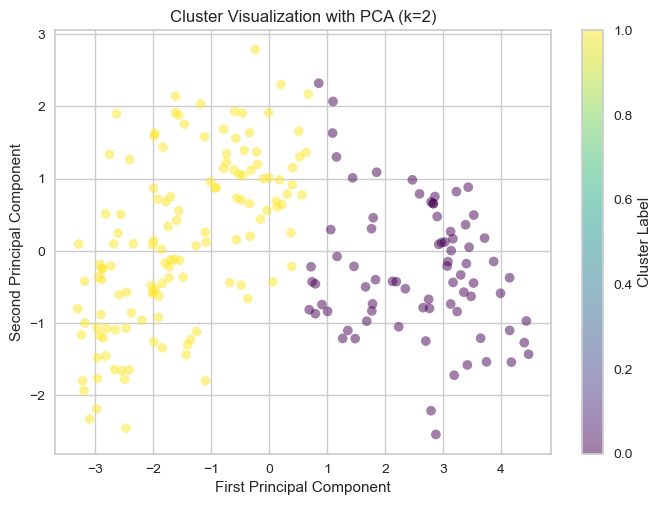

In [95]:
# TODO: Plot clustering results
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=cluster_labels, 
            cmap='viridis', 
            marker='o',
            edgecolor='none',
            alpha=0.5)
plt.title('Cluster Visualization with PCA (k=2)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Label')

plt.show()

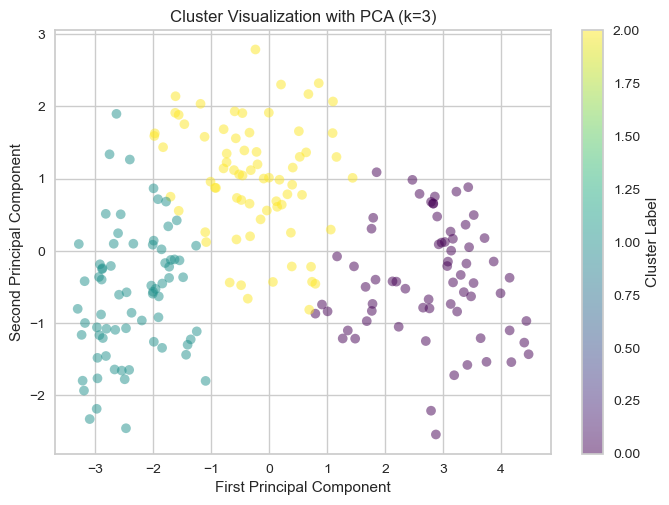

In [94]:
# plot for k=3
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster labels
cluster_labels_3 = kmeans_3.predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=cluster_labels_3, 
            cmap='viridis', 
            marker='o',
            edgecolor='none',
            alpha=0.5)
plt.title('Cluster Visualization with PCA (k=3)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Label')

plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [81]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(X_scaled)
variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n = np.where(variance_ratio >= 0.95)[0][0] + 1 

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [82]:
# TODO: Use PCA to transform the data
pca = PCA(n)
X_pca = pca.fit_transform(X_scaled)

In [83]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(X_pca)

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
# TODO: Calculate the three different validation metrics
labels_pca = kmeans_pca.labels_
silhouette_pca = silhouette_score(X_pca, labels_pca)
calinski_harabasz_pca = calinski_harabasz_score(X_pca, labels_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca, labels_pca)

# Output the scores
print(f"Silhouette Score: {silhouette_pca}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_pca}")
print(f"Davies-Bouldin Score: {davies_bouldin_pca}")

Silhouette Score: 0.4730808939247534
Calinski-Harabasz Score: 263.44636477730097
Davies-Bouldin Score: 0.7813442430910822


In [86]:
# Tried using k=3
kmeans_3_pca = KMeans(n_clusters=3, random_state=0).fit(X_pca)

labels_3_pca = kmeans_pca.labels_
silhouette_3_pca = silhouette_score(X_pca, labels_3_pca)
calinski_harabasz_3_pca = calinski_harabasz_score(X_pca, labels_3_pca)
davies_bouldin_3_pca = davies_bouldin_score(X_pca, labels_3_pca)

# Output the scores
print(f"Silhouette Score: {silhouette_3_pca}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_3_pca}")
print(f"Davies-Bouldin Score: {davies_bouldin_3_pca}")

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4730808939247534
Calinski-Harabasz Score: 263.44636477730097
Davies-Bouldin Score: 0.7813442430910822


Note: the scores did not change with k=2 or k=3

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [91]:
# TODO: Display results
results_2 = {
    'Silhouette Score without PCA': silhouette_cluster,
    'Silhouette Score with PCA': silhouette_pca,
    'Calinski-Harabasz Score without PCA': calinski_harabasz_cluster,
    'Calinski-Harabasz Score with PCA': calinski_harabasz_pca,
    'Davies-Bouldin Score without PCA': davies_bouldin_cluster,
    'Davies-Bouldin Score with PCA': davies_bouldin_pca
}

# Create a DataFrame to display results
results_df_2 = pd.DataFrame(list(results_2.items()), columns=['Metric', 'Value'])

print("KMeans Clustering Results for k=2\n")
print(results_df_2)

results_3 = {
    'Silhouette Score without PCA': silhouette_3_cluster,
    'Silhouette Score with PCA': silhouette_3_pca,
    'Calinski-Harabasz Score without PCA': calinski_harabasz_3_cluster,
    'Calinski-Harabasz Score with PCA': calinski_harabasz_3_pca,
    'Davies-Bouldin Score without PCA': davies_bouldin_3_cluster,
    'Davies-Bouldin Score with PCA': davies_bouldin_3_pca
}

# Create a DataFrame to display results
results_df_3 = pd.DataFrame(list(results_3.items()), columns=['Metric', 'Value'])

print("\n\nKMeans Clustering Results for k=3\n")
print(results_df_3)

KMeans Clustering Results for k=2

                                Metric       Value
0         Silhouette Score without PCA    0.465772
1            Silhouette Score with PCA    0.473081
2  Calinski-Harabasz Score without PCA  255.854827
3     Calinski-Harabasz Score with PCA  263.446365
4     Davies-Bouldin Score without PCA    0.796879
5        Davies-Bouldin Score with PCA    0.781344


KMeans Clustering Results for k=3

                                Metric       Value
0         Silhouette Score without PCA    0.400727
1            Silhouette Score with PCA    0.473081
2  Calinski-Harabasz Score without PCA  249.784175
3     Calinski-Harabasz Score with PCA  263.446365
4     Davies-Bouldin Score without PCA    0.927871
5        Davies-Bouldin Score with PCA    0.781344


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. Since the orginal dataset had three class labels, it makes sense that one of the optimal number of clusters was three (based on the Distortion score). However, using 2 as the number of clusters still resulted in similar results (as shown above).
1. Yes, the plots have similar distributions for the three classes when compared to the results for k=3 from Part 2. Unable to the compare the results from Part 1 with the results from Part 2 for k=2 since the results are uncomparable (3 classes vs 2 clusters).
1. Two components were used to explain at least 95% of the variance. In general, using PCA did improve the results. However, for both k=2 and k=3, the Davies-Bouldin score decreased with the use of PCA. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code for this part of the assignment was referenced from the in-class and lab examples. In addition, some code was referenced from Stack Overflow and online documentation.
2. The steps for this part of the assignment were completed in the order they were presented.
3. No generative AI was used for this part of the assignment.
4. The most challenging part of this portion of the assignment was deciding to use k=2 or k=3 since 2 of the 3 elbow method scores (k=3 (Distortion) and k=2 (Silhouette and Calinski Harabasz)) suggested k=2 but the number of class labels in the dataset was 3.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

- I enjoyed observing the effect of PCA on clustering and how the scores improved with the reduction of the number of features.
- I found the results of the elbow method and the validation metrics to be confusing as the number of clusters did not have a huge effect on the results. Thus, it was unclear whether k=2 or k=3 was the optimal choice. However, based on the original dataset having 3 class labels, it persuaded me to consider concluding that k=3 was the better option (for k=2 and k=3 with PCA, the results were identical).